# PyCaret Auto Machine Learning Classification
**Goal:** Practice using auto machine learning classification on a random dataset using PyCaret.

In [1]:
# importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# importing dataset
df = pd.read_csv('https://raw.githubusercontent.com/crosstrack10/data-science-projects/main/datasets/dataset_3a.csv', sep='\t')

# displaying first five rows
df.head()

,Outcome,Var1,Var2,Var3,Var4,Var5,Var6,Var7,Var8,Var9,...,Var109,Var110,Var111,Var112,Var113,Var114,Var115,Var116,Var117,Var118
0,0,2,23,0,0.00,0.00,0,0.00,0,0,...,0,0.0,0,0,0,0,0,0,0,39205.170
1,0,2,26,0,0.00,0.00,0,0.00,0,0,...,0,0.0,0,0,0,0,0,0,0,251638.950
2,0,2,26,0,0.00,0.00,0,0.00,0,0,...,0,0.0,0,0,0,0,0,0,0,75368.520
3,0,2,40,0,1658.37,247.56,0,1585.86,300,0,...,0,0.0,0,0,0,0,0,0,0,78390.810
4,0,2,39,0,0.00,0.00,0,0.00,0,0,...,0,0.0,0,0,0,0,0,0,0,117310.979


In [3]:
# counting data types
df.dtypes.value_counts()

int64      98
float64    21
dtype: int64

In [4]:
# splitting into features and label
X = df.drop(['Outcome'], axis=1)
y = df.Outcome

In [5]:
# importing train test split function
from sklearn.model_selection import train_test_split

# splitting data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, shuffle=True)

In [6]:
# importing module
from pycaret.classification import *

# initializing setup
clf1 = setup(df, target='Outcome', train_size=0.8, feature_selection=True)

,Description,Value
0,session_id,1501
1,Target,Outcome
2,Target Type,Binary
3,Label Encoded,"0: 0, 1: 1"
4,Original Data,"(7602, 119)"
5,Missing Values,False
6,Numeric Features,37
7,Categorical Features,81
8,Ordinal Features,False
9,High Cardinality Features,False


In [7]:
# returning best model based on accuracy
best_model = compare_models(n_select=15, sort='AUC', fold=5)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.9576,0.7944,0.0081,0.1067,0.0150,0.0110,0.0207,1.3840
ada,Ada Boost Classifier,0.9571,0.7662,0.0080,0.0786,0.0144,0.0097,0.0162,0.4420
lightgbm,Light Gradient Boosting Machine,0.9553,0.7467,0.0322,0.2157,0.0553,0.0448,0.0676,0.4800
rf,Random Forest Classifier,0.9548,0.7340,0.0362,0.1855,0.0598,0.0485,0.0659,0.4620
lda,Linear Discriminant Analysis,0.9444,0.7287,0.0441,0.0958,0.0594,0.0355,0.0385,0.3240
et,Extra Trees Classifier,0.9510,0.6673,0.0563,0.1768,0.0849,0.0671,0.0788,0.5400
lr,Logistic Regression,0.9576,0.5645,0.0040,0.0400,0.0073,0.0039,0.0046,2.8400
dt,Decision Tree Classifier,0.9240,0.5637,0.1646,0.1382,0.1499,0.1105,0.1111,0.0840
nb,Naive Bayes,0.1378,0.5265,0.9358,0.0427,0.0816,0.0036,0.0263,0.0520
knn,K Neighbors Classifier,0.9579,0.5245,0.0000,0.0000,0.0000,-0.0022,-0.0052,1.4060


The following models have the highest scores for each evaluation metric:
- Accuracy: Ridge Classfier
- AUC: Gradient Boosting Classifier
- Recall: Naive Bayes
- Precision: Random Forest Classifier
- F1 Score: Decision Tree Classifier
- Kappa: Decision Tree Classifier
- MCC: Decision Tree Classifier

I believe the gradient boosting classifier model is an ideal model to make predictions due to its high AUC and Accuracy scores. Although, if high precision is the goal then it makes more sense to use Naive Bayes.

In [8]:
# storing objects as pandas dataframe
pycaret_models_results = pull()
type(pycaret_models_results)

pandas.core.frame.DataFrame

In [9]:
# setting plot style
plt.style.use('seaborn')

# list of plots to plot
plot_list = ['auc', 'confusion_matrix', 'pr', 
             'feature', 'vc', 'learning']

# disabling matplotlib font manager logger
import logging
logging.getLogger('matplotlib.font_manager').disabled = True

## Gradient Boosting Classifier
This section shows visual evuation metrics for the gradient boosting classifier model.

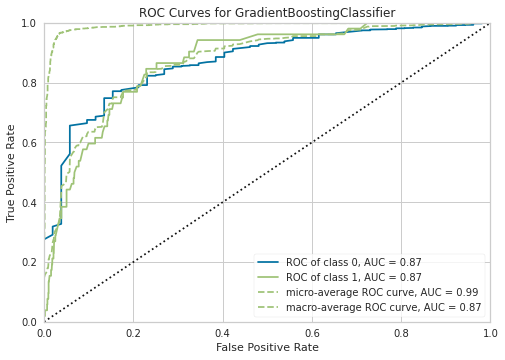

In [10]:
plot_model(best_model[0], plot=plot_list[0])

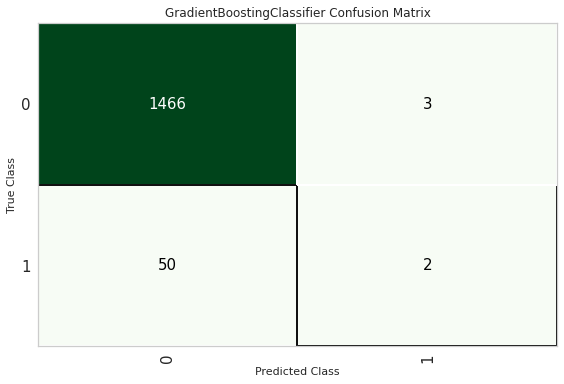

In [11]:
plot_model(best_model[0], plot=plot_list[1])

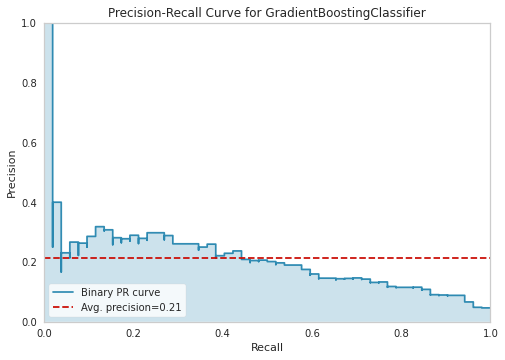

In [12]:
plot_model(best_model[0], plot=plot_list[2])

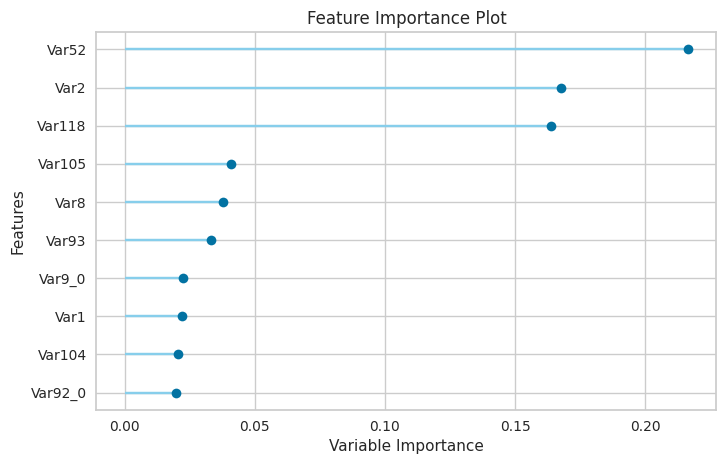

In [13]:
plot_model(best_model[0], plot=plot_list[3])

There are a few variables with at least a 0.10 importance in the gradient boosting classifier model. These are Var 52, 2, and 118.

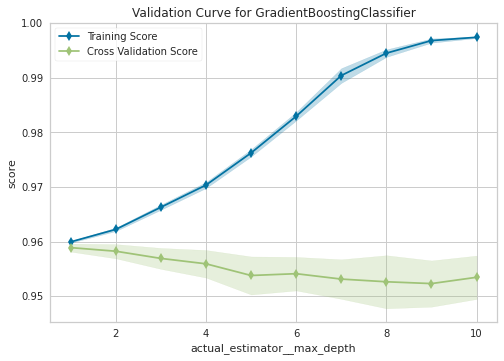

In [14]:
plot_model(best_model[0], plot=plot_list[4])

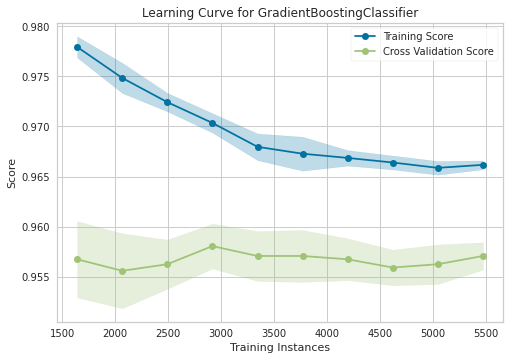

In [15]:
plot_model(best_model[0], plot=plot_list[5])

## Logistic Regression
This section shows visual evuation metrics for the logistic regression classifier model.

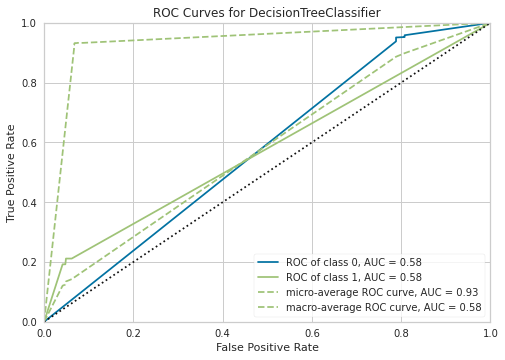

In [16]:
plot_model(best_model[7], plot=plot_list[0])

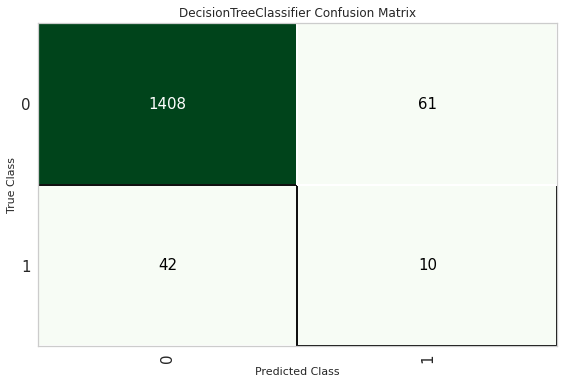

In [17]:
plot_model(best_model[7], plot=plot_list[1])

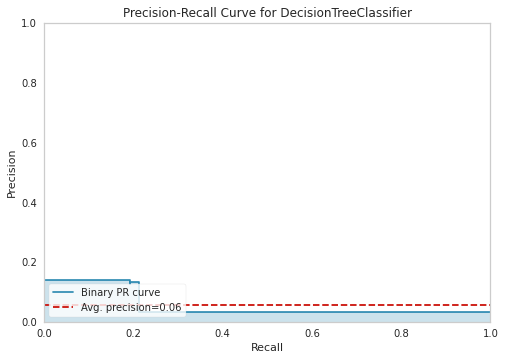

In [18]:
plot_model(best_model[7], plot=plot_list[2])

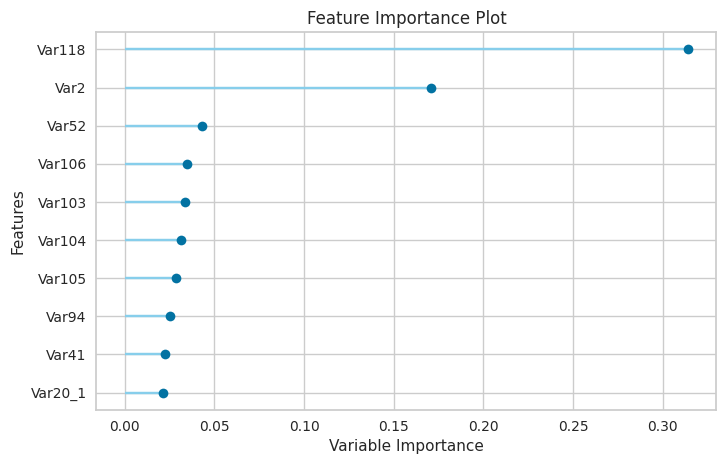

In [19]:
plot_model(best_model[7], plot=plot_list[3])

Variables with at least 0.10 importance: Var 2, 65, 109, and 7.

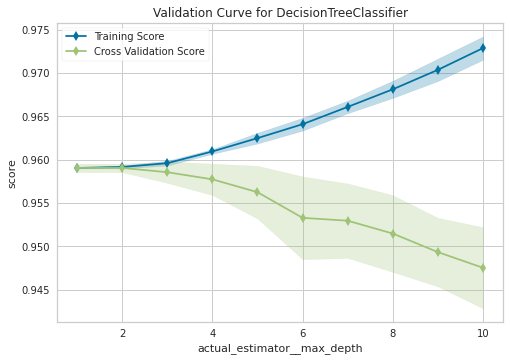

In [20]:
plot_model(best_model[7], plot=plot_list[4])

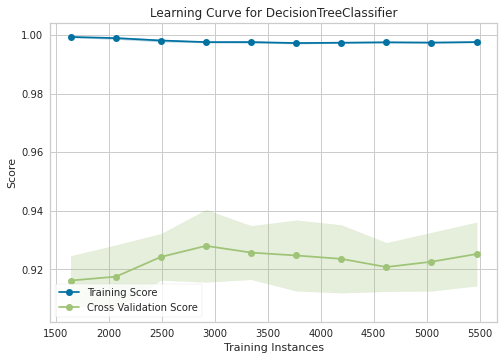

In [21]:
plot_model(best_model[7], plot=plot_list[5])

In [22]:
# finalizing gradient boosting classifier model
final_gbc = finalize_model(best_model[0])

In [23]:
# predictions
predictions = predict_model(final_gbc, data=X_test)
predictions

,Var1,Var2,Var3,Var4,Var5,Var6,Var7,Var8,Var9,Var10,...,Var111,Var112,Var113,Var114,Var115,Var116,Var117,Var118,Label,Score
5151,2,25,0,0.00,0.0,0,0.0,0,0,0,...,0,0,0,0,0,0,0,52455.390,0,0.9819
642,2,23,0,0.00,0.0,0,0.0,0,0,0,...,0,0,0,0,0,0,0,42882.390,0,0.9912
197,2,23,0,0.00,0.0,0,0.0,0,0,0,...,0,0,0,0,0,0,0,376994.880,0,0.9887
1454,2,32,60,0.00,0.0,0,0.0,0,0,0,...,0,0,0,0,0,0,0,79768.620,0,0.9791
6007,2,28,0,0.00,0.0,0,0.0,0,0,0,...,0,0,0,0,0,0,0,106623.750,0,0.9905
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
898,2,25,0,0.00,0.0,0,0.0,0,0,0,...,0,0,0,0,0,0,0,41049.840,0,0.9932
4819,2,30,0,0.00,0.0,0,0.0,0,0,0,...,0,0,0,0,0,0,0,117310.979,0,0.9639
3066,2,33,0,582.51,0.0,0,0.0,690,0,0,...,0,0,0,0,0,0,0,117310.979,0,0.9753
966,2,41,0,63.00,0.0,0,0.0,0,0,0,...,0,0,0,0,0,0,0,99872.280,0,0.9915
